## Importing Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Data Collection and Processing

In [3]:
# Loading the dataset into pandas dataframe
gold_data = pd.read_csv('gld_price_data.csv')

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
gold_data.shape

(2290, 6)

In [10]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
# Checking the missing values in columns
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
# Statistical Measures
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## Correlation:
1). Positive Correlation

2). Negative Correlation

In [14]:
correlation = gold_data.corr()
correlation

<ipython-input-14-6a7ebe6011c6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

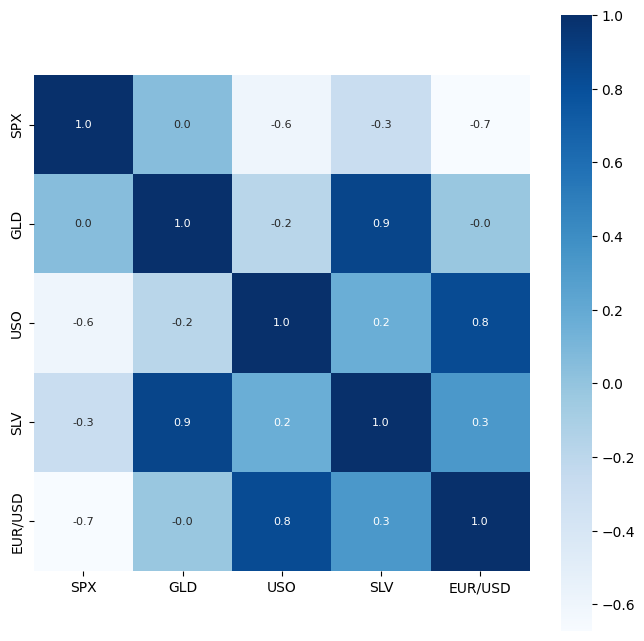

In [16]:
# Heatmap
plt.figure(figsize = (8, 8))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Blues')

In [17]:
# Correlation value for GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-18-aaa3212a04f0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color =  'green')


<Axes: xlabel='GLD', ylabel='Density'>

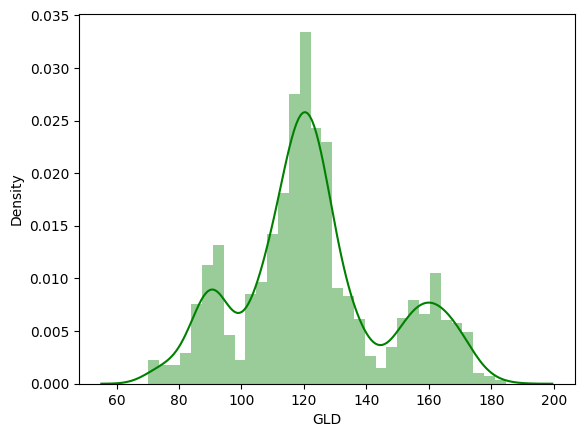

In [18]:
# Checking the distribution of the GLD price
sns.distplot(gold_data['GLD'], color =  'green')

array([[<Axes: title={'center': 'SPX'}>, <Axes: title={'center': 'GLD'}>],
       [<Axes: title={'center': 'USO'}>, <Axes: title={'center': 'SLV'}>],
       [<Axes: title={'center': 'EUR/USD'}>, <Axes: >]], dtype=object)

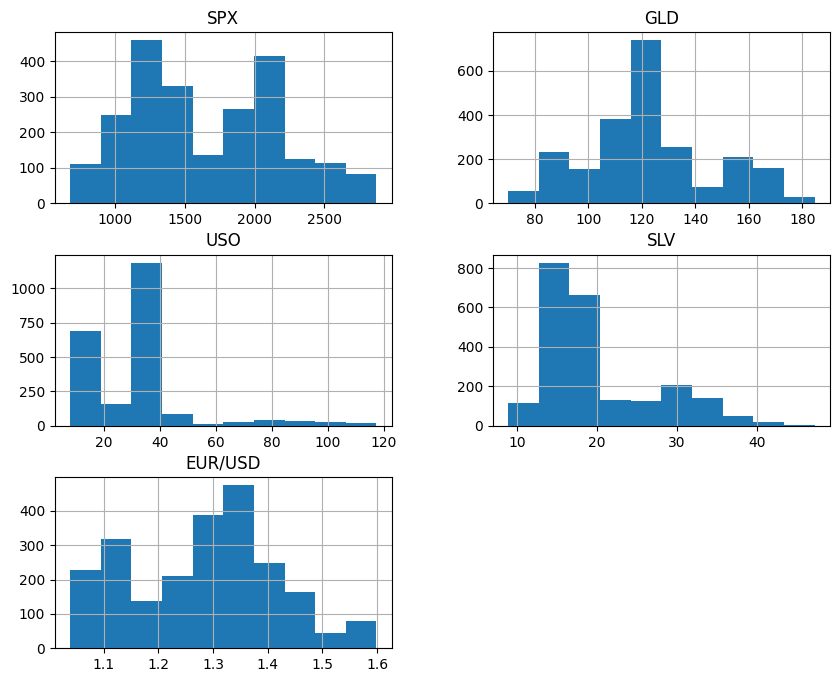

In [20]:
gold_data.hist(figsize = (10, 8))

<Figure size 800x800 with 0 Axes>

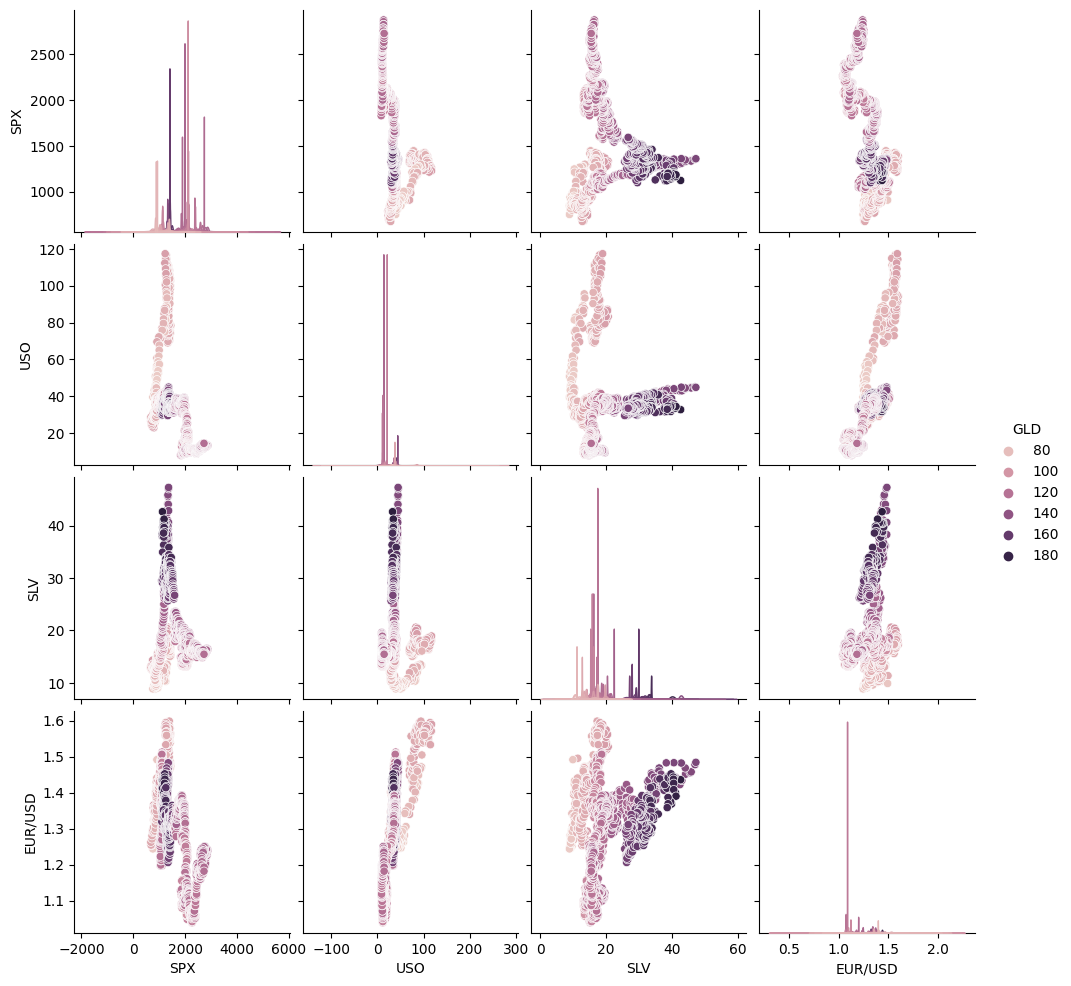

In [21]:
plt.figure(figsize = (8, 8))
sns.pairplot(gold_data, hue = 'GLD')

## Splitting Features and target

In [22]:
X = gold_data.drop(['Date', 'GLD'], axis = 1)
y = gold_data['GLD']

## Splitting into Training and Testing set

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

## Model Training: Random Forest Regressor

In [24]:
regressor = RandomForestRegressor(n_estimators = 100)

In [25]:
# Training the model
regressor.fit(X_train, y_train)

RandomForestRegressor()

## Model Evaluation

In [26]:
# Prediction on test data
test_data_prediction = regressor.predict(X_test)

In [28]:
# R Squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print('R Squared Error: ', error_score)

R Squared Error:  0.9896057777641247


## Compare the Actual Price and Predicted Price

In [29]:
y_test = list(y_test)

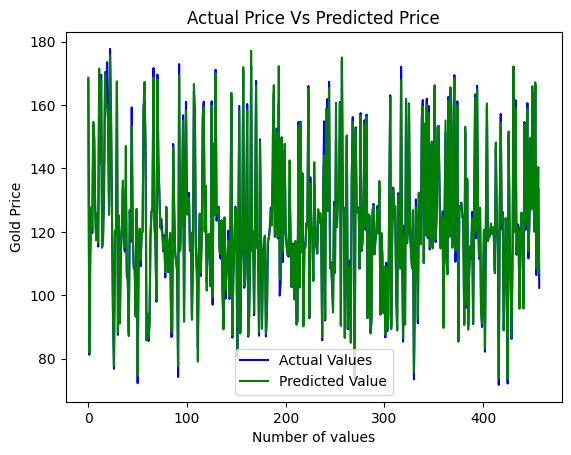

In [33]:
plt.plot(y_test, color = 'blue', label = 'Actual Values')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted Value')
plt.title('Actual Price Vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Gold Price')
plt.legend()
plt.show()